In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

dataset = pd.read_csv('streamlit/dataset/new_acre_valve.csv')

dataset.head()


,id,region,building_type,square_feet,spray_count,mp_count,drip_count,rotor_count,valve_count,mix_manufacturers,value_mill,general_contractor
0,202100847180,Central States,hospital,186652.0,14,0,5,0,19,True,25.2,Harvey Clearly Builders
1,201900664272,Central States,school,28760.0,23,0,0,26,49,True,38.0,Pogue Construction
2,202300402748,Central States,school,122296.0,27,0,11,7,45,False,20.0,Noble Texas Builders
3,202300441418,Central States,school,8695.0,6,0,0,1,7,True,3.0,NaN
4,202300082736,Central States,housing,3292.0,0,6,0,0,6,False,5.2,Cheyenne Construction Group


In [2]:
# include column with est irrigation market

def calculate_new_col(col):
    return col['spray_count']*252.1 + col['mp_count']*364.2 + col['drip_count']*475 + col['rotor_count']*188.8 

# Apply function to create new column
dataset['est_irrig_value'] = dataset.apply(calculate_new_col, axis=1)

dataset.head()


,id,region,building_type,square_feet,spray_count,mp_count,drip_count,rotor_count,valve_count,mix_manufacturers,value_mill,general_contractor,est_irrig_value
0,202100847180,Central States,hospital,186652.0,14,0,5,0,19,True,25.2,Harvey Clearly Builders,5904.4
1,201900664272,Central States,school,28760.0,23,0,0,26,49,True,38.0,Pogue Construction,10707.1
2,202300402748,Central States,school,122296.0,27,0,11,7,45,False,20.0,Noble Texas Builders,13353.3
3,202300441418,Central States,school,8695.0,6,0,0,1,7,True,3.0,NaN,1701.4
4,202300082736,Central States,housing,3292.0,0,6,0,0,6,False,5.2,Cheyenne Construction Group,2185.2


In [3]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np

numeric_features = ['square_feet', 'spray_count', 'mp_count', 'drip_count', 'rotor_count', 'valve_count', 'value_mill', 'est_irrig_value']
categorical_features = ['region', 'building_type', 'mix_manufacturers', 'general_contractor']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

processed_data = preprocessor.fit_transform(dataset)

encoded_categorical_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)

all_feature_names = np.hstack([numeric_features, encoded_categorical_names])

processed_df = pd.DataFrame(processed_data, columns=all_feature_names)

processed_df.head()


,square_feet,spray_count,mp_count,drip_count,rotor_count,valve_count,value_mill,est_irrig_value,region_Central States,region_Florida,...,general_contractor_Tonn & Blank,general_contractor_Tovey Shultz,general_contractor_Triton Construction,general_contractor_Urban Habitat,general_contractor_Vantage Construction Services,general_contractor_W.T Rich Company,general_contractor_Walsh Construction Co.,general_contractor_Wasatch West Construction,general_contractor_Workman Commercial,general_contractor_Xylem Water Solutions
0,0.524297,0.721480,-0.358781,0.460254,-0.427632,-0.082291,0.461218,-0.041978,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.287280,1.667110,-0.358781,-0.535487,1.883361,1.439527,0.986293,0.731566,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.193502,2.087390,-0.358781,1.655143,0.194558,1.236618,0.247906,1.157774,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.390416,-0.119079,-0.358781,-0.535487,-0.338748,-0.691018,-0.449459,-0.718931,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.418188,-0.749499,0.000666,-0.535487,-0.427632,-0.741745,-0.359211,-0.641008,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
import tensorflow as tf
from tensorflow.keras import layers, Model
import numpy as np


In [5]:
latent_dim = 20  

# Encoder
input_data = tf.keras.Input(shape=(processed_df.shape[1],))
encoded = layers.Dense(256, activation='relu')(input_data) 
encoded = layers.Dense(128, activation='relu')(encoded)   
encoded = layers.Dense(64, activation='relu')(encoded)     
encoded = layers.Dense(32, activation='relu')(encoded)
z_mean = layers.Dense(latent_dim, name='z_mean')(encoded)
z_log_var = layers.Dense(latent_dim, name='z_log_var')(encoded)


def sampling(args):
    z_mean, z_log_var = args
    batch = tf.shape(z_mean)[0]
    dim = tf.shape(z_mean)[1]
    epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

z = layers.Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_var])

# Encoder model
encoder = Model(input_data, [z_mean, z_log_var, z], name='encoder')
encoder.summary()


Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 118)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 256)       │     30,464 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 128)       │     32,896 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 64)        │      8,256 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 32)        │      2,080 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_mean (Dense)      │ (None, 20)        │        660 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_log_var (Dense)   │ (None, 20)        │        660 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z (Lambda)          │ (None, 20)        │          0 │ z_mean[0][0],     │
│                     │                   │            │ z_log_var[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 75,016 (293.03 KB)

 Trainable params: 75,016 (293.03 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Decoder
latent_inputs = tf.keras.Input(shape=(latent_dim,), name='z_sampling')
decoded = layers.Dense(64, activation='relu')(latent_inputs)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(256, activation='relu')(decoded)    # Added new layer
output_data = layers.Dense(processed_df.shape[1], activation='sigmoid')(decoded)


# Decoder model
decoder = Model(latent_inputs, output_data, name='decoder')
decoder.summary()


Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ z_sampling (InputLayer)         │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 118)            │        30,326 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 73,014 (285.21 KB)

 Trainable params: 73,014 (285.21 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
output = decoder(encoder(input_data)[2])

vae = Model(input_data, output, name='vae')


In [8]:
import tensorflow as tf
from tensorflow.keras import layers, Model

class VAE(Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.reconstruction_loss_fn = tf.keras.losses.MeanSquaredError()

    def call(self, inputs):
        z_mean, z_log_var, z = self.encoder(inputs)
        reconstructed = self.decoder(z)

        reconstruction_loss = tf.reduce_mean(self.reconstruction_loss_fn(inputs, reconstructed) * inputs.shape[1])

        kl_loss = 1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
        kl_loss = tf.reduce_sum(kl_loss, axis=-1)
        kl_loss *= -0.5

        self.add_loss(reconstruction_loss + kl_loss)

        return reconstructed

vae = VAE(encoder, decoder)
vae.compile(optimizer='adam')


In [9]:
x_train = processed_df.values

vae.fit(x_train, x_train, epochs=400, batch_size=200)


Epoch 1/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 3428.6926
Epoch 2/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 3336.4937
Epoch 3/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 3248.4983
Epoch 4/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3149.0049
Epoch 5/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3070.3208
Epoch 6/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2951.1030
Epoch 7/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 2837.0112
Epoch 8/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2708.7192
Epoch 9/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2577.7803
Epoch 10/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2421.0449
Epoch 11/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2227.5896
Epoch 12/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 2080.2190
Epoch 13/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1906.8772
Epoch 14/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1745.7612
Epoch 15/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms

In [10]:
# Generate new synthetic data
z_sample = np.random.normal(size=(10, latent_dim))
generated_data = decoder.predict(z_sample)

# Convert the generated data back to a DataFrame
generated_df = pd.DataFrame(generated_data, columns=all_feature_names)

# Display the generated data
generated_df.head()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


,square_feet,spray_count,mp_count,drip_count,rotor_count,valve_count,value_mill,est_irrig_value,region_Central States,region_Florida,...,general_contractor_Tonn & Blank,general_contractor_Tovey Shultz,general_contractor_Triton Construction,general_contractor_Urban Habitat,general_contractor_Vantage Construction Services,general_contractor_W.T Rich Company,general_contractor_Walsh Construction Co.,general_contractor_Wasatch West Construction,general_contractor_Workman Commercial,general_contractor_Xylem Water Solutions
0,0.005033,0.002073,0.002573,0.002737,0.003016,0.004053,0.002971,0.002671,0.155785,0.085958,...,0.002142,0.002762,0.003486,0.005255,0.001834,0.002679,0.002817,0.001077,0.006142,0.001344
1,0.001800,0.001696,0.001834,0.001809,0.001826,0.001956,0.001230,0.001664,0.097650,0.080758,...,0.001604,0.001262,0.001546,0.002690,0.000663,0.002191,0.001174,0.000554,0.003315,0.000690
2,0.008725,0.004421,0.003838,0.008483,0.004643,0.004692,0.003578,0.003760,0.085436,0.075671,...,0.003756,0.003082,0.005231,0.007983,0.003114,0.005745,0.003180,0.001379,0.009184,0.001364
3,0.006459,0.004577,0.004052,0.006251,0.005957,0.008654,0.005904,0.002870,0.154837,0.073912,...,0.005242,0.003690,0.007353,0.009840,0.003872,0.003785,0.004473,0.001991,0.008812,0.001658
4,0.009568,0.006559,0.007230,0.009362,0.009094,0.006831,0.006417,0.005162,0.139409,0.104599,...,0.007215,0.006165,0.006781,0.014196,0.004014,0.008468,0.006049,0.002763,0.009591,0.003348


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step


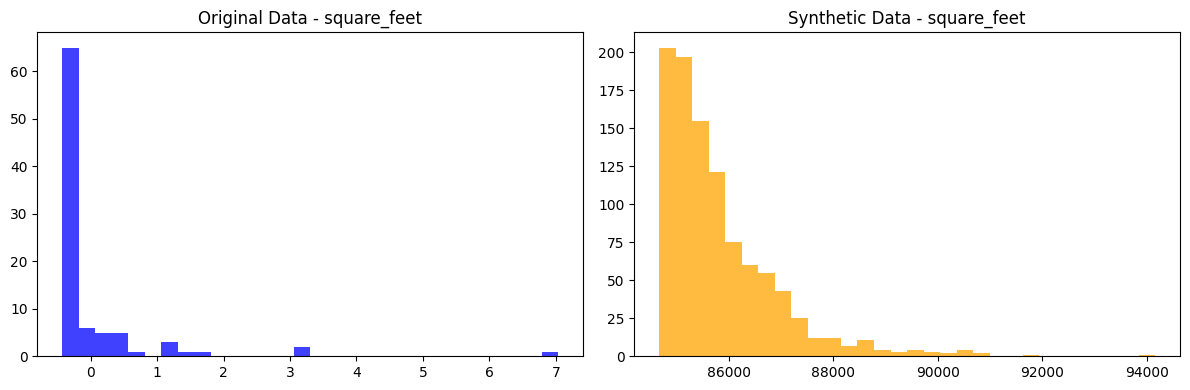

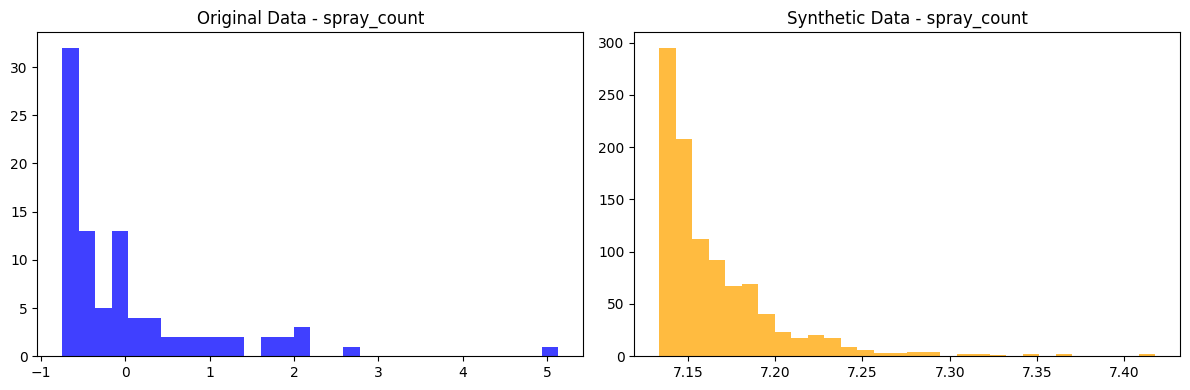

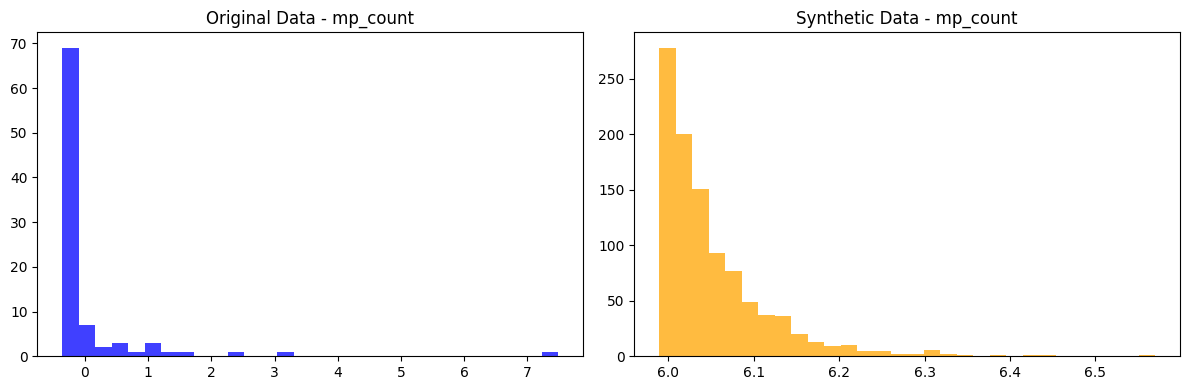

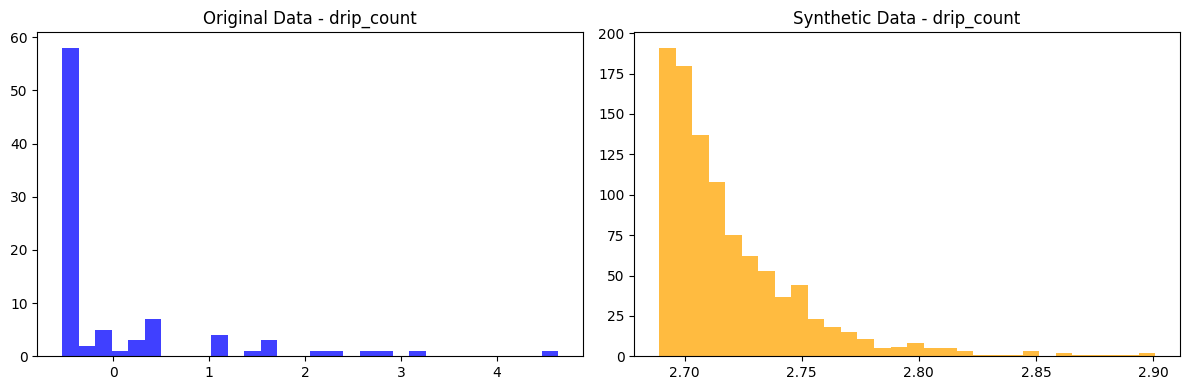

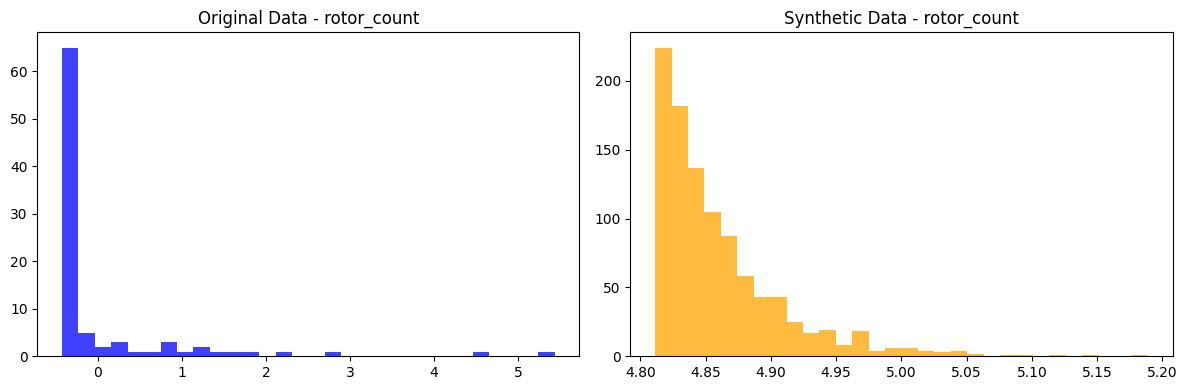

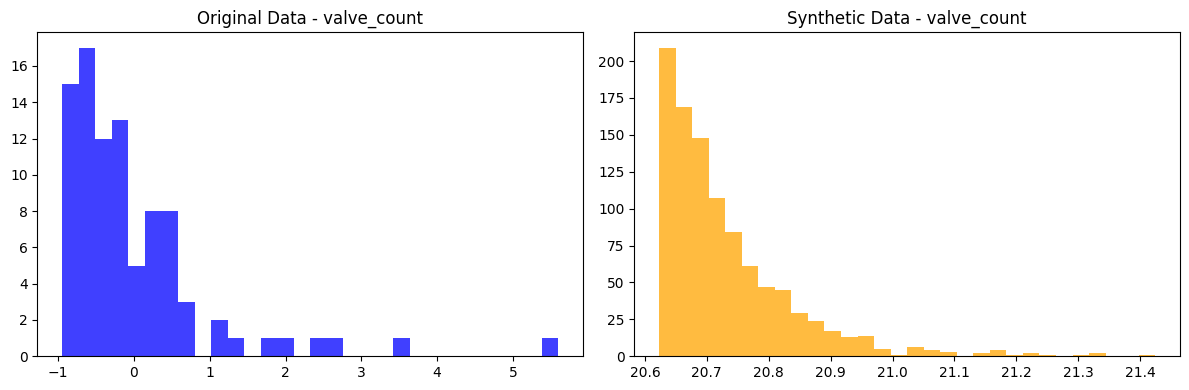

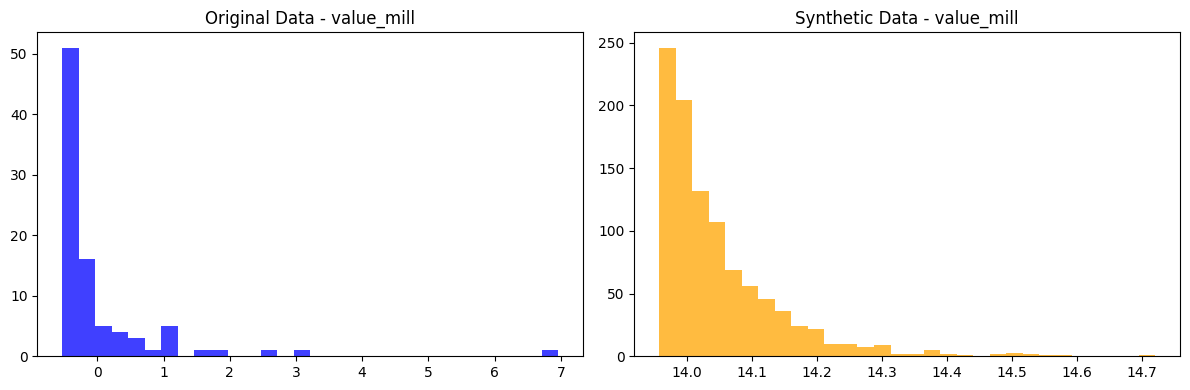

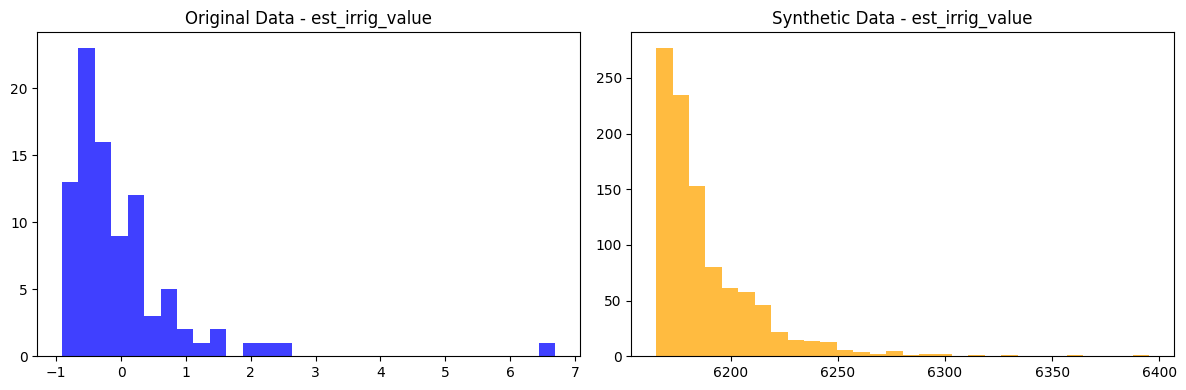

In [11]:
import matplotlib.pyplot as plt

n_synthetic_samples = 1000  

scaler = preprocessor.named_transformers_['num']['scaler']

z_samples = np.random.normal(size=(n_synthetic_samples, latent_dim))
generated_data = decoder.predict(z_samples)

generated_df = pd.DataFrame(generated_data, columns=all_feature_names)

generated_df[numeric_features] = scaler.inverse_transform(generated_df[numeric_features])

for column in numeric_features:
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.hist(processed_df[column], bins=30, alpha=0.75, label='Original Data', color='blue')
    plt.title(f'Original Data - {column}')
    plt.subplot(1, 2, 2)
    plt.hist(generated_df[column], bins=30, alpha=0.75, label='Synthetic Data', color='orange')
    plt.title(f'Synthetic Data - {column}')
    plt.tight_layout()
    plt.show()



In [12]:
categorical_transformer = preprocessor.named_transformers_['cat']['onehot']
encoded_categorical_names = categorical_transformer.get_feature_names_out(categorical_features)

generated_numeric_df = generated_df[numeric_features]
generated_categorical_df = generated_df[encoded_categorical_names]

inverse_transformed_categorical = categorical_transformer.inverse_transform(generated_categorical_df)

inverse_categorical_df = pd.DataFrame(inverse_transformed_categorical, columns=categorical_features)

final_synthetic_df = pd.concat([generated_numeric_df, inverse_categorical_df], axis=1)

final_synthetic_df.head()



,square_feet,spray_count,mp_count,drip_count,rotor_count,valve_count,value_mill,est_irrig_value,region,building_type,mix_manufacturers,general_contractor
0,85234.718750,7.149302,6.043196,2.709883,4.840835,20.697994,14.014829,6180.711914,Northwest,school,True,Nix Construction
1,84726.335938,7.134474,5.991887,2.690656,4.814344,20.628605,13.960571,6166.109863,Great Lakes,school,True,Nix Construction
2,85313.890625,7.146823,6.017686,2.703749,4.842934,20.679026,14.001696,6175.539062,Great Lakes,school,True,Nix Construction
3,85895.671875,7.170534,6.067482,2.747759,4.878036,20.739206,14.075331,6197.946777,Southern California,school,True,Nix Construction
4,84834.171875,7.141663,6.003306,2.693675,4.822279,20.646875,13.972655,6169.180176,Southeast,school,True,Nix Construction


In [13]:
import ast
from pathlib import Path
import plotly.express as px
pd.options.plotting.backend = 'plotly'
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, classification_report, precision_score
from statsmodels.miscmodels.ordinal_model import OrderedModel
import re
# from dsc80_utils import * # Feel free to uncomment and use this.
# import warnings
# warnings.filterwarnings("ignore")

In [14]:
# #Baseline Model
# #generated_df

# final_df_base = generated_df

# cols_to_round = ['valve_count','square_feet','est_irrig_value']

# final_df_base[cols_to_round] = final_df_base[cols_to_round].round()

# X = final_df_base[['valve_count', 'square_feet']]
# y = final_df_base['est_irrig_value']
# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# # Initialize the model
# model = RandomForestClassifier(n_estimators=100, random_state=42)
# # Train the model
# model.fit(X_train, y_train)
# # Make predictions
# y_pred = model.predict(X_test)
# print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

In [15]:
# #Final Model
# X = final_df_base[['valve_count', 'mp_count', 'spray_count', 'drip_count', 'rotor_count', 'square_feet', 'value_mill']]
# y = final_df_base['est_irrig_value']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# # Initialize the model
# model = RandomForestClassifier(n_estimators=100, random_state=42)
# # Train the model
# model.fit(X_train, y_train)
# # Make predictions
# y_pred = model.predict(X_test)
# # Evaluate the model
# print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

In [16]:
X = generated_df.drop("est_irrig_value", axis = 1)
y = generated_df["est_irrig_value"]
X_preprocessed = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Model pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                         ('regressor', RandomForestRegressor())])

# Training the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print(f'Model R^2 score: {score}')

ValueError: A given column is not a column of the dataframe

In [ ]:
# can also utilize cost per square feet --> create a calculator that way 

In [ ]:
print(X.columns)

Index(['square_feet', 'spray_count', 'mp_count', 'drip_count', 'rotor_count',
       'valve_count', 'value_mill', 'region_Central States', 'region_Florida',
       'region_Florida ',
       ...
       'general_contractor_Tonn & Blank', 'general_contractor_Tovey Shultz ',
       'general_contractor_Triton Construction',
       'general_contractor_Urban Habitat',
       'general_contractor_Vantage Construction Services',
       'general_contractor_W.T Rich Company',
       'general_contractor_Walsh Construction Co.',
       'general_contractor_Wasatch West Construction',
       'general_contractor_Workman Commercial ',
       'general_contractor_Xylem Water Solutions'],
      dtype='object', length=117)
